In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
import xgboost as xgb
from xgboost import XGBClassifier

In [2]:
from imblearn.under_sampling import RandomUnderSampler
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, confusion_matrix, roc_auc_score, auc

In [3]:
df = pd.read_csv('/Users/charminagar/Downloads/df_for_model.csv', encoding='latin-1')

In [4]:
df.head()

,Comnpany_Logo,Range_of_Salary,Qualification_bachelor's degree,Salary_Specified,Type_of_Employment_unspecified,Qualification_high school,City_Specified,Experience_entry level,Qualification_master's degree,Experience_unspecified,...,Job Title_embed,Profile_embed,Department_embed,Job_Description_embed,Requirements_embed,Job_Benefits_embed,Type_of_Industry_embed,Operations_embed,City_embed,Fraudulent
0,1,0.000064,0,0,1,0,1,0,0,0,...,[-4.58608493e-02 2.12311279e-02 3.97200063e-...,[ 7.57737411e-03 -7.53783286e-02 -9.88812753e-...,[-5.47758937e-02 1.92629527e-02 -2.80399639e-...,[-4.28126380e-02 -4.59875539e-02 3.53232771e-...,[ 5.25006577e-02 -7.03689456e-02 1.71322133e-...,[-4.31027077e-02 6.56370372e-02 -6.75226450e-...,[-4.31027077e-02 6.56370372e-02 -6.75226450e-...,[-5.47758527e-02 1.92629341e-02 -2.80399323e-...,[ 8.63630697e-02 -1.98833738e-02 7.14936703e-...,0
1,1,0.000064,0,0,1,0,1,0,0,1,...,[-1.17126264e-01 2.77831382e-03 -1.29374452e-...,[-1.03874601e-01 -2.86145303e-02 -1.75224356e-...,[-4.31027077e-02 6.56370372e-02 -6.75226450e-...,[-5.67804910e-02 -5.34146605e-03 4.22535762e-...,[ 5.35701402e-03 -1.40999006e-02 -1.83974057e-...,[-4.31027077e-02 6.56370372e-02 -6.75226450e-...,[-4.31027077e-02 6.56370372e-02 -6.75226450e-...,[-4.31027077e-02 6.56370372e-02 -6.75226450e-...,[-8.61143023e-02 2.20292192e-02 1.35004222e-...,0
2,1,0.000064,1,0,0,0,1,0,0,0,...,[ 4.59693419e-03 4.81805997e-03 5.61004803e-...,[ 3.36016826e-02 2.67076027e-02 3.24560329e-...,[-5.99851981e-02 5.02520166e-02 -3.38837020e-...,[ 6.79077506e-02 -3.56016830e-02 -3.88150178e-...,[ 5.84511384e-02 -6.93934634e-02 8.84997752e-...,[ 5.48424758e-02 -2.61770543e-02 5.13948454e-...,[-7.63907805e-02 1.44250859e-02 7.63018057e-...,[-5.99852316e-02 5.02519980e-02 -3.38837095e-...,[ 2.98751630e-02 7.29545280e-02 4.19618338e-...,0
3,1,0.000064,1,0,0,0,1,0,0,0,...,[-7.77300671e-02 4.42555510e-02 -9.83385593e-...,[-6.86832815e-02 -1.00228742e-01 -2.99047511e-...,[-4.31027077e-02 6.56370372e-02 -6.75226450e-...,[-6.13101721e-02 -4.14161161e-02 -1.45597698e-...,[-4.47404943e-02 -6.80395663e-02 -4.66844114e-...,[-9.30000748e-03 1.11222237e-01 2.06504874e-...,[-2.40202416e-02 7.45742396e-02 1.62536111e-...,[-8.91374573e-02 6.87410980e-02 3.76313925e-...,[ 6.75367787e-02 -1.44326175e-02 -5.12554459e-...,0
4,0,0.000064,0,0,1,0,0,0,0,1,...,[-7.38978684e-02 8.47627893e-02 -7.17384219e-...,[-4.31027263e-02 6.56369701e-02 -6.75225854e-...,[-4.31027077e-02 6.56370372e-02 -6.75226450e-...,[-3.57331708e-02 2.42543034e-02 -1.39074121e-...,[-4.31027077e-02 6.56370372e-02 -6.75226450e-...,[-4.31027077e-02 6.56370372e-02 -6.75226450e-...,[-4.31027077e-02 6.56370372e-02 -6.75226450e-...,[-4.31027077e-02 6.56370372e-02 -6.75226450e-...,[-1.01084542e-02 1.73952547e-04 -6.45254329e-...,0


In [5]:
df1 = df

In [6]:
embedded_cols = ["Job Title_embed","Profile_embed","Department_embed","Job_Description_embed","Requirements_embed",
                "Job_Benefits_embed","Type_of_Industry_embed","Operations_embed","City_embed"]
categorical_feats = ["Qualification_bachelor's degree", "Salary_Specified", "Type_of_Employment_unspecified",
                     "Qualification_high school", "City_Specified", "Experience_entry level","Qualification_master's degree",
                     "Experience_unspecified", "Telecomunication","Qualification_vocational / certification/ professional",
                     "Experience_midsenior level", "Qualification_unspecified", "Type_of_Employment_fulltime"]

In [7]:
def convert_to_array(s):
    cleaned_str = s.strip('[]').replace('\n', ' ').replace('  ', ' ').strip()
    return np.fromstring(cleaned_str, sep=' ')

for col in embedded_cols:
    df1[col] = df1[col].apply(convert_to_array)

In [10]:
#standardise
scaler = StandardScaler()
X_text = np.hstack([np.vstack(df1[col]) for col in embedded_cols]) 
X_cat = df1[categorical_feats].values 
X_num = df1[['Range_of_Salary']].values

In [11]:

X = np.hstack([X_text, X_cat, X_num]) 
X_std = scaler.fit_transform(X) 

In [12]:
#PCA
pca = PCA()
X_pca = pca.fit_transform(X_std)

In [ ]:
# cumulative explained variance ratio for components to keep
explained_var_ratio = pca.explained_variance_ratio_
cumulative_var_ratio = np.cumsum(explained_var_ratio)
plt.plot(range(1, len(cumulative_var_ratio) + 1), cumulative_var_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio vs. Number of Principal Components')


In [14]:

pca = PCA(n_components=50)
X_pca = pca.fit_transform(X_std)

explained_variance = pca.explained_variance_ratio_
variance_first_1000 = explained_variance.sum()
print(f"Variance explained by first 1000 components: {variance_first_1000:.3f}")

Variance explained by first 1000 components: 0.511


In [15]:

df2 = pd.DataFrame(X_pca) #PCA df

y = df1['Fraudulent'] #target

X_train, X_test, y_train, y_test = train_test_split(df2, y, test_size=0.2, random_state=4263)

print("Counts of label '1' in training data: {}".format(sum(y_train == 1)))
print("Counts of label '0' in training data: {}".format(sum(y_train == 0)))

Counts of label '1' in training data: 588
Counts of label '0' in training data: 7936


In [16]:
#resampling
def resampling_method(method, X_train, y_train):
    if method == 'Undersampling':
        rus = RandomUnderSampler(random_state=4263)
        X_train_balanced, y_train_balanced = rus.fit_resample(X_train, y_train)
    elif method == 'Oversampling':
        ros = RandomOverSampler(random_state=4263)
        X_train_balanced, y_train_balanced = ros.fit_resample(X_train, y_train)
    else:
        print('Invalid resampling method')
    resampled_class_counts = pd.Series(y_train_balanced).value_counts()
    print("Resampled class counts:")
    print(resampled_class_counts)
    return X_train_balanced, y_train_balanced

#oversampling to balance
X_train_balanced, y_train_balanced = resampling_method('Oversampling', X_train, y_train)

Resampled class counts:
Fraudulent
0    7936
1    7936
Name: count, dtype: int64


XGBoost

In [17]:
#XGBoost classifier initial
model_xgb = xgb.XGBClassifier(
    n_estimators=100, 
    max_depth=6,           
    learning_rate=0.1,     
    random_state=4263,    
    scale_pos_weight=1,   
    eval_metric="mlogloss"
)

Accuracy: 0.9676360225140713
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1990
           1       0.79      0.70      0.74       142

    accuracy                           0.97      2132
   macro avg       0.89      0.84      0.86      2132
weighted avg       0.97      0.97      0.97      2132



array([[1964,   26],
       [  43,   99]])

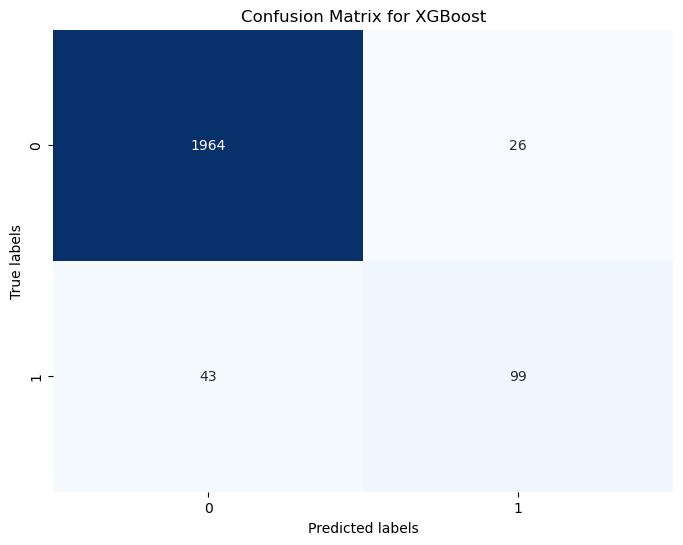

In [18]:

#train and evaluate
model_xgb.fit(X_train_balanced, y_train_balanced)

#predictions
y_pred_xgb = model_xgb.predict(X_test)

def evaluate_model(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False, ax=ax)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title(f'Confusion Matrix for {model_name}')
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    return cm

#evaluations 
evaluate_model(y_test, y_pred_xgb, 'XGBoost')


In [19]:
def auc_roc(model,model_name,X_test,y_test):
    pred_prob = model.predict_proba(X_test)
    auc_score = round(roc_auc_score(y_test, pred_prob[:,1]),3)
    fpr, tpr, thresh = roc_curve(y_test, pred_prob[:,1], pos_label=1)
    plt.plot(fpr, tpr, linestyle='--',color='orange', label ='ROC curve (area = %0.3f)' % auc_score)
    plt.title('ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive rate')
    plt.legend(loc='best')
    plt.show()
    
    return print(f'AUC score: {auc_score}')
    

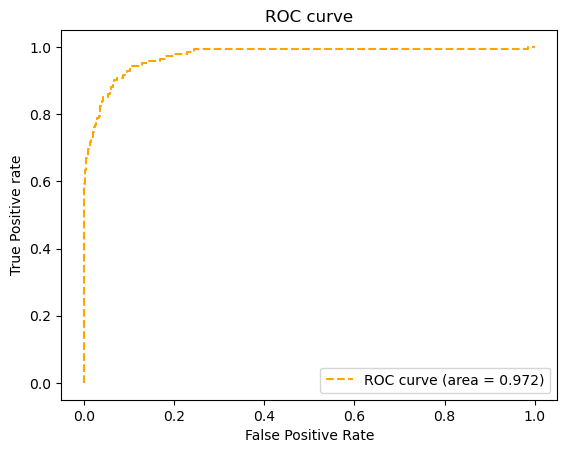

AUC score: 0.972


In [20]:

auc_roc(model_xgb,'XGBoost',X_test,y_test)

Decision tree

In [21]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train_balanced, y_train_balanced)
y_pred_dt = model_dt.predict(X_test)


Accuracy: 0.9385553470919324
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1990
           1       0.54      0.50      0.52       142

    accuracy                           0.94      2132
   macro avg       0.75      0.73      0.74      2132
weighted avg       0.94      0.94      0.94      2132



array([[1930,   60],
       [  71,   71]])

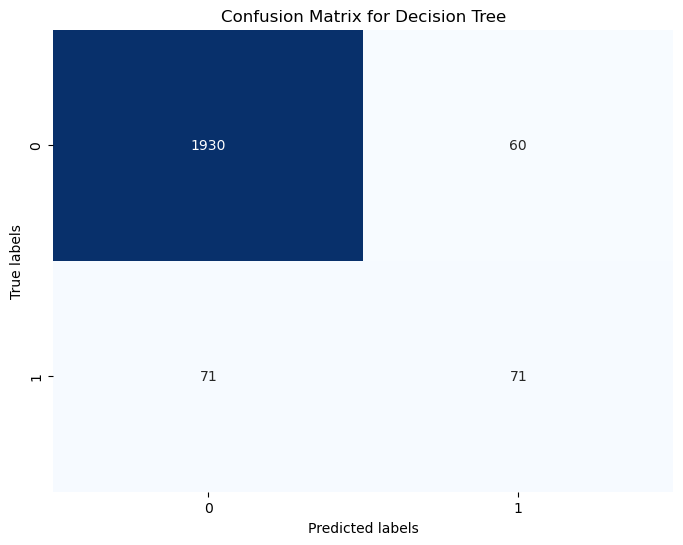

In [22]:
evaluate_model(y_test, y_pred_dt, 'Decision Tree')


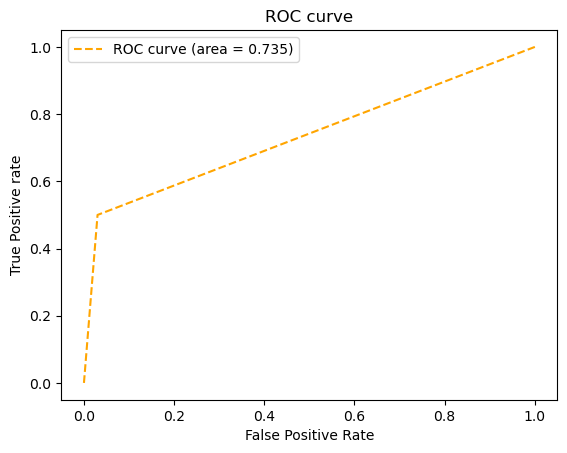

AUC score: 0.735


In [23]:
auc_roc(model_dt,'Decision tree',X_test,y_test)

Hyperparameter tuning for decision tree

In [24]:
from sklearn.model_selection import GridSearchCV

#Hyperparameter tuning
param_grid = {
    'max_depth': [3, 5, 10, 15], #avoid overfitting
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 5, 10],   
    'criterion': ['gini', 'entropy']
}

model_dt = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(model_dt, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train_balanced, y_train_balanced)

#best
print("Best Parameters:", grid_search.best_params_)



Best Parameters: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2}


Accuracy: 0.9469981238273921
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1990
           1       0.60      0.60      0.60       142

    accuracy                           0.95      2132
   macro avg       0.79      0.79      0.79      2132
weighted avg       0.95      0.95      0.95      2132



array([[1934,   56],
       [  57,   85]])

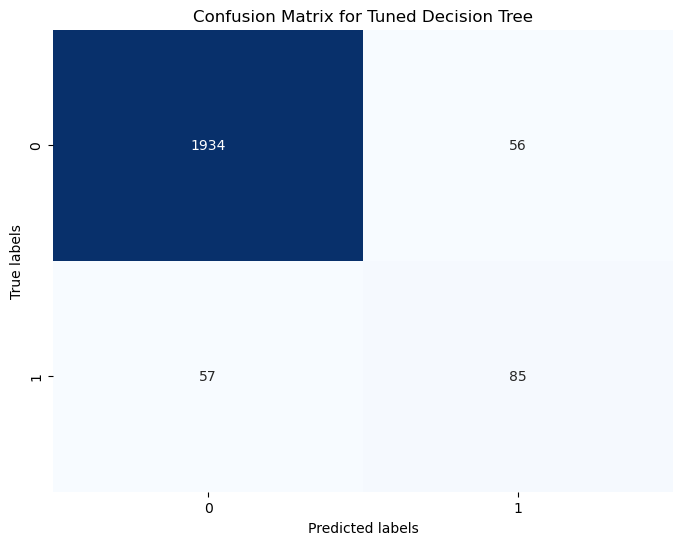

In [25]:
best_model_dt = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=15,
    min_samples_leaf=1,
    min_samples_split=2,
    random_state=42
)
best_model_dt.fit(X_train_balanced, y_train_balanced)
y_pred_dt_best = best_model_dt.predict(X_test)


evaluate_model(y_test, y_pred_dt_best, 'Tuned Decision Tree')
